<a href="https://colab.research.google.com/github/mRuggi/IA-2022/blob/main/Elaborato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elaborato di Intelligenza Artificiale
## Lavinia Russo N46005998 Matteo Ruggiero N46005027

Abbiamo due data-set, uno studio cross-sectional ed uno longitudinale.  
La principale differenza tra i due è riassunta nel seguente schema 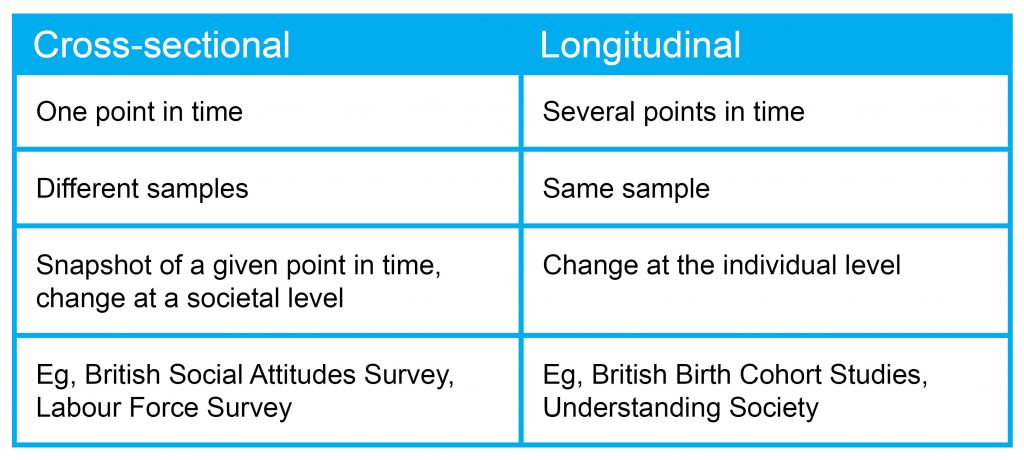

In [ ]:
#import di librerie & syscheck per versioni e compatibilità
import sys
print('Python: {}'.format(sys.version))
import scipy as sp 
print('scipy: {}'.format(sp.__version__))
import numpy as np 
print('numpy: {}'.format(np.__version__))
import matplotlib as mpl 
print('matplotlib: {}'.format(mpl.__version__))
import pandas as pd 
print('scipy: {}'.format(pd.__version__))
import sklearn 
print('sklearn: {}'.format(sklearn.__version__))

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier #inutile PER ORA
from sklearn.neighbors import KNeighborsClassifier #se fallisce logistic e decision tree


#enable del plot inline e configurazione seaborn
%matplotlib inline
sns.set(style="white", color_codes=True)

Python: 3.7.13 (default, Apr 24 2022, 01:04:09) 
[GCC 7.5.0]
scipy: 1.4.1
numpy: 1.21.6
matplotlib: 3.2.2
scipy: 1.3.5
sklearn: 1.0.2


Analisi statistica dei dati:  
- classificazione statistica del dataset (media, deviazione standard, minimo, massimo...) per ciascuna categoria
- istogrammi per categoria 
- rappresentazione mediante grafico a torta della percentuale di malati, sani e convertiti sul totale 
- grafico di dispersione:  
1) età ed educazione  
2) totale volume intracranico stimato e volume cerebrale di riferimento  
3) età e status sociale
- pdf della distribuzione dei pazienti per categoria ed età

            Visit     MR Delay         Age        EDUC         SES  \
count  373.000000   373.000000  373.000000  373.000000  354.000000   
mean     1.882038   595.104558   77.013405   14.597855    2.460452   
std      0.922843   635.485118    7.640957    2.876339    1.134005   
min      1.000000     0.000000   60.000000    6.000000    1.000000   
25%      1.000000     0.000000   71.000000   12.000000    2.000000   
50%      2.000000   552.000000   77.000000   15.000000    2.000000   
75%      2.000000   873.000000   82.000000   16.000000    3.000000   
max      5.000000  2639.000000   98.000000   23.000000    5.000000   

             MMSE         CDR         eTIV        nWBV         ASF  
count  371.000000  373.000000   373.000000  373.000000  373.000000  
mean    27.342318    0.290885  1488.128686    0.729568    1.195461  
std      3.683244    0.374557   176.139286    0.037135    0.138092  
min      4.000000    0.000000  1106.000000    0.644000    0.876000  
25%     27.000000    0.0

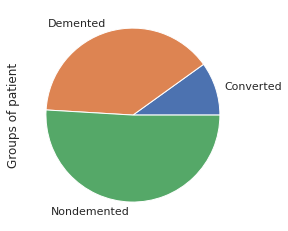

In [ ]:
#open csv and convert it to a dataframe object
longitudinal=open('/content/Alzheimer features/oasis_longitudinal.csv','r')
data=pd.read_csv(longitudinal)
#get some statistics on the dataframe columns
print(data.describe())
print("--------------------------------------------------------------------")
#pie chart of the categorical variable
print(data.groupby('Group').size())
groups=(data.groupby('Group').size())
groups.plot(kind='pie', ylabel='Groups of patient', subplots=True)
plt.show()

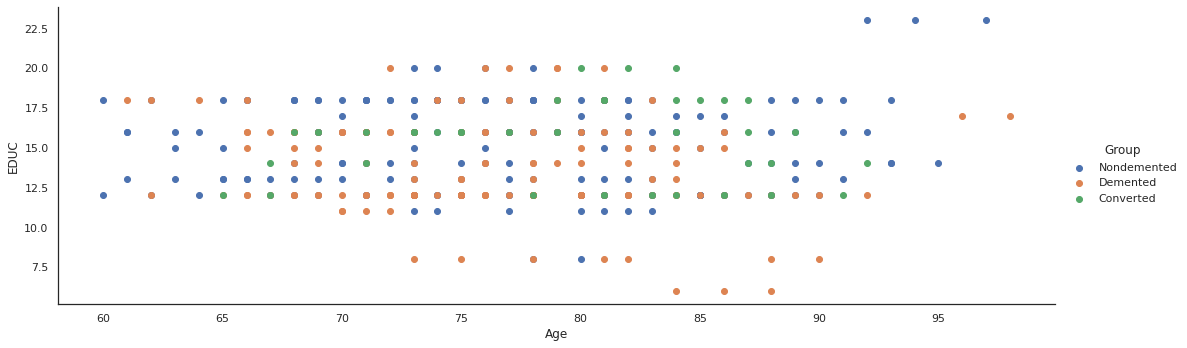

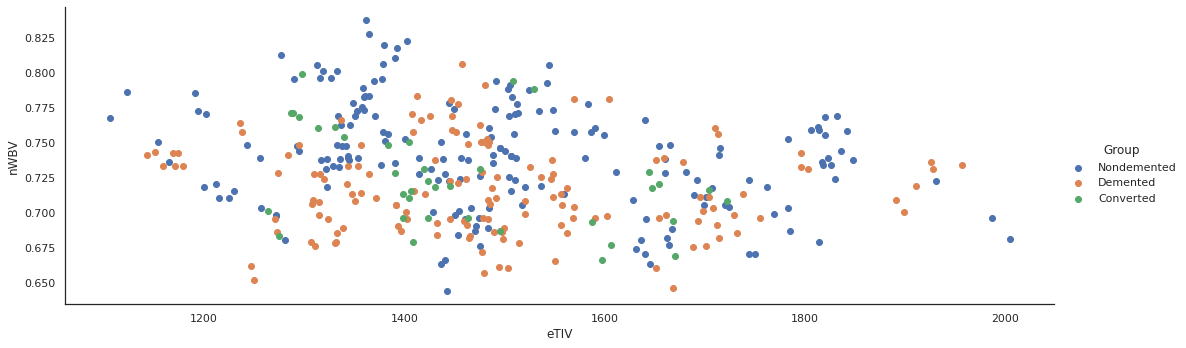

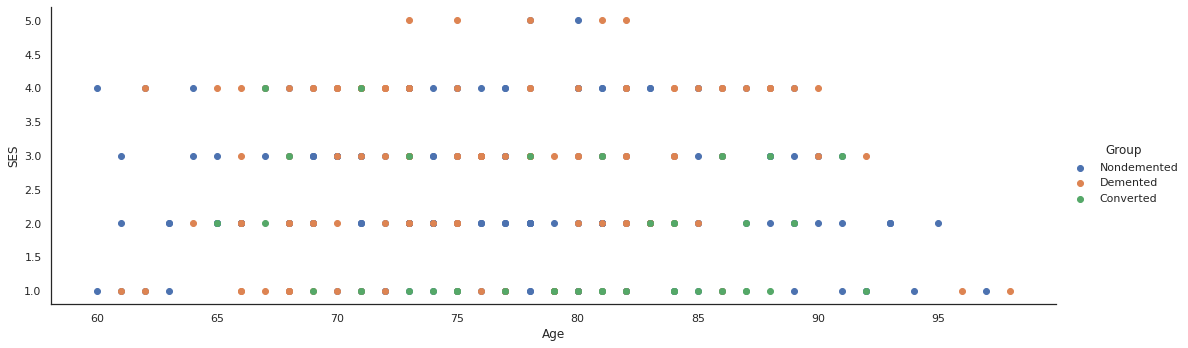

In [ ]:
#Scatter matrix and scatter plot of the 'Group' categorical variable
sns.FacetGrid(data, hue="Group", height=5, aspect=3) \
   .map(plt.scatter, "Age", "EDUC") \
   .add_legend()
plt.show()

sns.FacetGrid(data, hue="Group", height=5, aspect=3) \
   .map(plt.scatter, "eTIV", "nWBV") \
   .add_legend()
plt.show()

sns.FacetGrid(data, hue="Group", height=5, aspect=3) \
   .map(plt.scatter, "Age", "SES") \
   .add_legend()
plt.show()

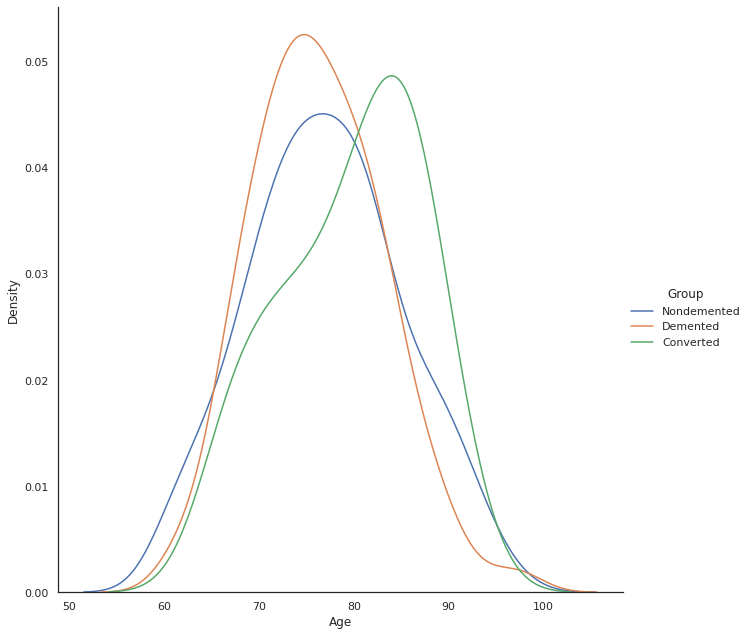

In [ ]:
#k-density plot AGE/Group
sns.FacetGrid(data, hue="Group", height=9, aspect=1) \
   .map(sns.kdeplot, "Age") \
   .add_legend()
plt.show()

In [ ]:
#dataframe conversion to numpy array 
array = data.values
raw_target = array[:,2]
#definition of y vector
y = np.where(raw_target == 'Nondemented', 1, 0)
print (y)

[1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1
 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 1]


In [ ]:
#definition of X matrix
X=array [:, (0,1,3,4,5,6,7,8,9,10,11,12,13,14)]
print ('Dimensioni della matrice X delle categorie: ', X.shape)
print ('Dimensioni del vettore y del target: ', y.shape)
#split
test_size = 0.25
seed = 3
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed, shuffle=True) #shuffle è True di default
print ('Dimensioni di X_train: ', X_train.shape)
print ('Dimensioni di X_test:  ', X_test.shape)
print ('Dimensioni di y_train: ', y_train.shape)
print ('Dimensioni di y_test:  ', y_test.shape)
print ('Testa di X_train: \n', X_train[:10])
print ('Testa di X_test:  \n', X_test[:10])
print ('Testa di y_train: ', y_train[:10])
print ('Testa di y_test:  ', y_test[:10])


Dimensioni della matrice X delle categorie:  (373, 14)
Dimensioni del vettore y del target:  (373,)
Dimensioni di X_train:  (279, 14)
Dimensioni di X_test:   (94, 14)
Dimensioni di y_train:  (279,)
Dimensioni di y_test:   (94,)
Testa di X_train: 
 [['OAS2_0017' 'OAS2_0017_MR3' 3 617 'M' 'R' 81 12 3.0 27.0 0.5 1814 0.759
  0.968]
 ['OAS2_0089' 'OAS2_0089_MR1' 1 0 'M' 'R' 70 12 2.0 29.0 0.5 1432 0.692
  1.225]
 ['OAS2_0119' 'OAS2_0119_MR2' 2 733 'F' 'R' 83 15 2.0 29.0 0.0 1482 0.751
  1.184]
 ['OAS2_0184' 'OAS2_0184_MR1' 1 0 'F' 'R' 72 16 3.0 24.0 0.5 1354 0.733
  1.296]
 ['OAS2_0114' 'OAS2_0114_MR2' 2 570 'F' 'R' 78 12 nan 27.0 1.0 1309 0.709
  1.341]
 ['OAS2_0068' 'OAS2_0068_MR2' 2 743 'F' 'R' 90 12 3.0 29.0 0.0 1475 0.676
  1.19]
 ['OAS2_0014' 'OAS2_0014_MR1' 1 0 'M' 'R' 76 16 3.0 21.0 0.5 1602 0.697
  1.096]
 ['OAS2_0095' 'OAS2_0095_MR2' 2 673 'M' 'R' 72 18 1.0 29.0 0.0 1785 0.687
  0.983]
 ['OAS2_0035' 'OAS2_0035_MR2' 2 405 'F' 'R' 89 12 4.0 27.0 0.0 1329 0.733
  1.32]
 ['OAS2_0171'